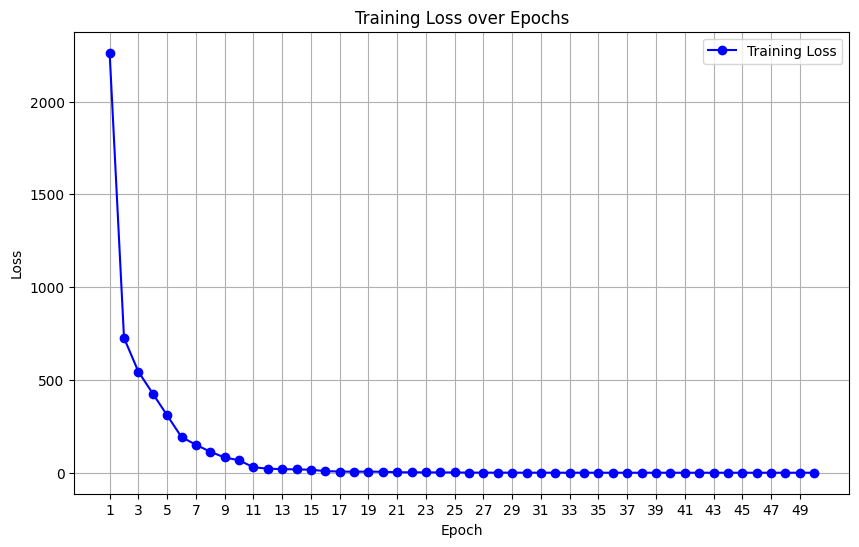

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Training loss values from your log
epochs = np.arange(1, 51)
loss_values = np.array([
    2263.1691,
    726.3902,
    544.6390,
    426.7636,
    309.3355,
    192.1064,
    150.8448,
    113.1584,
    82.3547,
    67.0888,
    29.4127,
    21.8914,
    19.3434,
    18.0315,
    16.2351,
    8.5982,
    6.4839,
    5.6074,
    5.9560,
    5.2190,
    2.7237,
    2.0614,
    2.0297,
    1.6641,
    1.3958,
    0.8483,
    0.5476,
    0.4838,
    0.4016,
    0.3051,
    0.3855,
    0.2043,
    0.2048,
    0.1754,
    0.1488,
    0.1151,
    0.1065,
    0.1259,
    0.0917,
    0.1156,
    0.0976,
    0.0799,
    0.0838,
    0.0742,
    0.0822,
    0.0891,
    0.0697,
    0.0689,
    0.0666,
    0.0614
])

# Create a figure and axis
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_values, marker='o', linestyle='-', color='b', label='Training Loss')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.xticks(epochs[::2])  # Show every 2nd epoch for clarity
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("training_loss.png", dpi=300)
plt.show()


In [20]:
import pandas as pd
import sacrebleu

df = pd.read_csv("../validation_results.csv")
# Convert to lists
refs = df["ref_text"].tolist()
hyps = df["hyp_text"].tolist()

refs_nested = [refs]  # wrap in an extra list
score = sacrebleu.corpus_bleu(hyps, refs_nested)
print("BLEU:", score.score)


BLEU: 96.88198188994733


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_wer_cer_distributions(csv_file="validation_results.csv"):
    """
    Reads a CSV of lip reading validation results with columns:
      speaker_id, video, ref_text, hyp_text, wer, cer
    and creates two plots:
      1) A boxplot comparing WER vs. CER distribution.
      2) Histograms of WER and CER across all videos.
    """

    # 1) Read CSV
    df = pd.read_csv(csv_file)
    
    # Convert WER/CER to numeric if they aren't already
    df["wer"] = pd.to_numeric(df["wer"], errors="coerce")
    df["cer"] = pd.to_numeric(df["cer"], errors="coerce")
    
    # Extract arrays
    wer_values = df["wer"].dropna().values
    cer_values = df["cer"].dropna().values
    
    # -- BOX PLOT --
    plt.figure(figsize=(6, 5))
    plt.boxplot([wer_values, cer_values], labels=["WER", "CER"])
    plt.title("Distribution of WER and CER (1,000 videos)")
    plt.ylabel("Error Rate")
    plt.grid(axis="y", alpha=0.4)
    plt.tight_layout()
    plt.savefig("boxplot_wer_cer.png", dpi=300)
    plt.show()
    
    # -- HISTOGRAM --
    plt.figure(figsize=(8, 5))
    bins = 20  # number of bins, adjust as you like
    plt.hist(wer_values, bins=bins, alpha=0.6, label="WER")
    plt.hist(cer_values, bins=bins, alpha=0.6, label="CER")
    plt.xlabel("Error Rate")
    plt.ylabel("Number of Videos")
    plt.title("Histogram of WER and CER")
    plt.legend()
    plt.tight_layout()
    plt.savefig("histogram_wer_cer.png", dpi=300)
    plt.show()


C:\Users\smath\AppData\Local\Temp\ipykernel_21964\798954251.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([wer_values, cer_values], labels=["WER", "CER"])


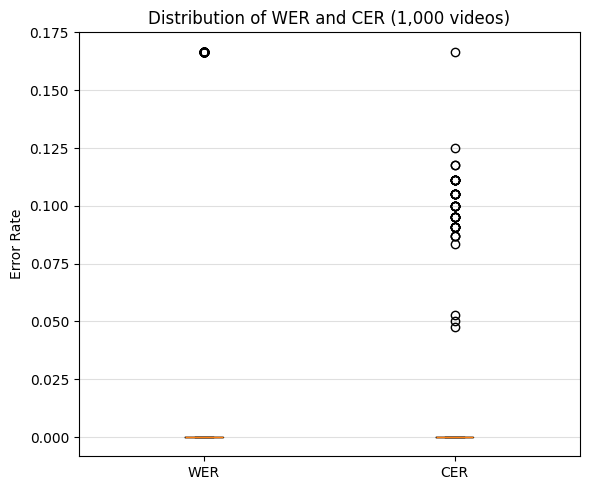

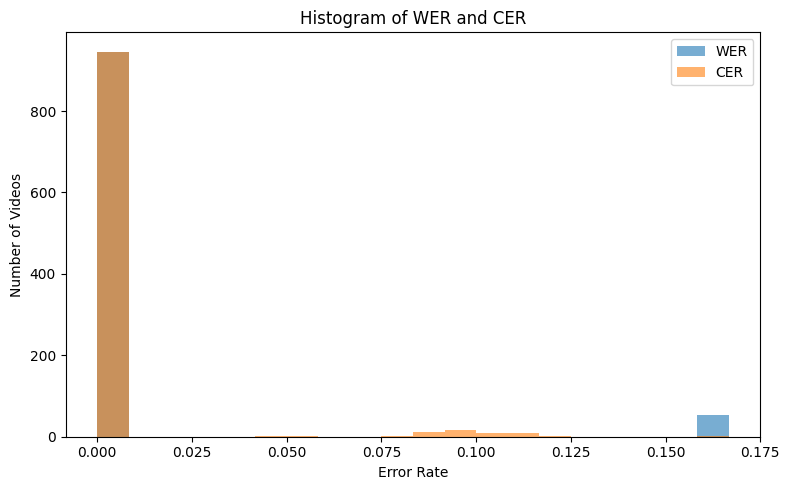

In [4]:
plot_wer_cer_distributions("../validation_results.csv")

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_wer_cer_side_by_side(csv_file="validation_results.csv"):
    """
    Reads a CSV (columns: speaker_id, video, ref_text, hyp_text, wer, cer),
    then plots two separate histograms (WER on the left, CER on the right).
    """
    # Read CSV
    df = pd.read_csv(csv_file)

    # Ensure numeric
    df["wer"] = pd.to_numeric(df["wer"], errors="coerce")
    df["cer"] = pd.to_numeric(df["cer"], errors="coerce")

    # Drop any NaN
    wer_values = df["wer"].dropna()
    cer_values = df["cer"].dropna()

    # Create subplots: 1 row, 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram for WER
    axes[0].hist(wer_values, bins=20, color="skyblue", alpha=0.8)
    axes[0].set_title("WER Distribution")
    axes[0].set_xlabel("WER")
    axes[0].set_ylabel("Number of Videos")

    # Histogram for CER
    axes[1].hist(cer_values, bins=20, color="salmon", alpha=0.8)
    axes[1].set_title("CER Distribution")
    axes[1].set_xlabel("CER")
    axes[1].set_ylabel("Number of Videos")

    plt.tight_layout()
    plt.savefig("wer_cer_hist_side_by_side.png", dpi=300)
    plt.show()


C:\Users\smath\AppData\Local\Temp\ipykernel_21964\798954251.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([wer_values, cer_values], labels=["WER", "CER"])


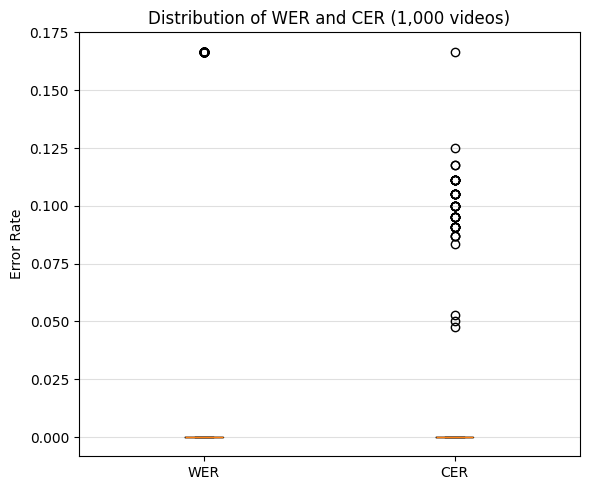

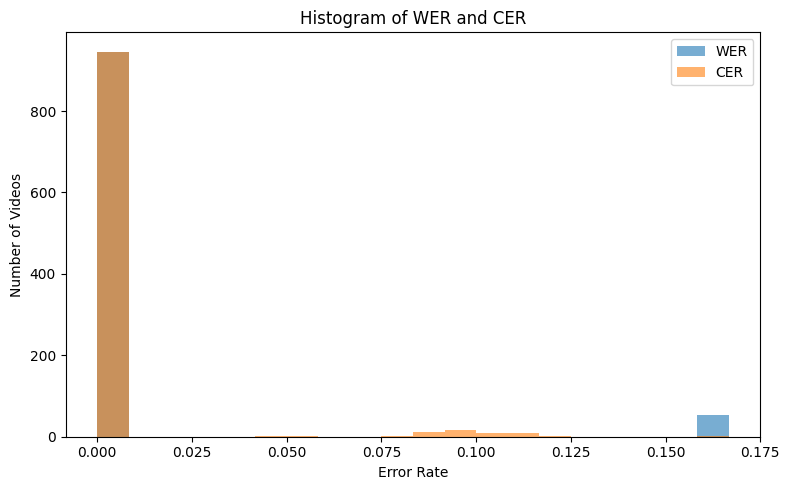

In [9]:
plot_wer_cer_distributions("../validation_results.csv")

In [12]:
import pandas as pd

def create_speaker_metrics_table(csv_file="validation_results.csv"):
    """
    Reads a CSV with columns [speaker_id, video, ref_text, hyp_text, wer, cer],
    computes the average WER and CER for each speaker,
    and outputs a formatted table.
    """
    df = pd.read_csv(csv_file)

    # Convert WER/CER columns to numeric in case they're strings
    df["wer"] = pd.to_numeric(df["wer"], errors="coerce")
    df["cer"] = pd.to_numeric(df["cer"], errors="coerce")

    # Group by speaker and compute average
    summary = df.groupby("speaker_id", as_index=False).agg({
        "wer": "mean",
        "cer": "mean"
    })

    # Round to 4 decimal places or as you like
    summary["wer"] = summary["wer"].round(4)
    summary["cer"] = summary["cer"].round(4)

    print("=== Average WER/CER per Speaker ===")
    print(summary.to_string(index=False))

    # If you want a Markdown-style table (for GitHub, etc.)
    try:
        # .to_markdown is available in newer pandas versions
        print("\n**Markdown Table**")
        print(summary.to_markdown(index=False))
    except AttributeError:
        print("\nMarkdown table not supported in this pandas version. Upgrade to >=1.0 for to_markdown.")



In [13]:
create_speaker_metrics_table("../validation_results.csv")

=== Average WER/CER per Speaker ===
speaker_id   wer    cer
       s34 0.009 0.0054

**Markdown Table**
| speaker_id   |   wer |    cer |
|:-------------|------:|-------:|
| s34          | 0.009 | 0.0054 |


In [18]:
import pandas as pd

def error_rate_windows(csv_file="validation_results.csv"):
    """
    Reads a CSV (speaker_id, video, ref_text, hyp_text, wer, cer),
    bins WER and CER into the following windows:
      1) 0%
      2) (0%, 2%]
      3) (2%, 5%]
      4) (5%, 10%]
      5) > 10%
    Then prints two tables: one for WER and one for CER.
    """
    df = pd.read_csv(csv_file)
    
    # Convert WER/CER to numeric
    df["wer"] = pd.to_numeric(df["wer"], errors="coerce")
    df["cer"] = pd.to_numeric(df["cer"], errors="coerce")
    
    # Drop missing
    df = df.dropna(subset=["wer", "cer"])
    wer_values = df["wer"].values
    cer_values = df["cer"].values
    
    # Function to count windows
    def bin_counts(values, name="WER"):
        total = len(values)
        eq_zero = sum(values == 0)
        upto_2   = sum((values > 0) & (values <= 0.02))
        upto_5   = sum((values > 0.02) & (values <= 0.05))
        upto_10  = sum((values > 0.05) & (values <= 0.1))
        upto_15  = sum((values > 0.1) & (values <= 0.15))
        upto_20  = sum((values > 0.15) & (values <= 0.2))
        above_20 = sum(values > 0.2)
        
        # Build a table (list of rows)
        rows = [
            [f"{name} = 0%", eq_zero],
            [f"{name} <= 2%", upto_2],
            [f"{name} <= 5%", upto_5],
            [f"{name} <= 10%", upto_10],
            [f"{name} <= 15%", upto_15],
            [f"{name} <= 20%", upto_20],
            [f"{name} > 20%", above_20],
            ["Total videos", total]
        ]
        return rows
    
    # Make separate tables for WER & CER
    wer_table = bin_counts(wer_values, name="WER")
    cer_table = bin_counts(cer_values, name="CER")
    
    # Print results
    print("=== WER Windows ===")
    print_tabular(wer_table)
    
    print("\n=== CER Windows ===")
    print_tabular(cer_table)

def print_tabular(rows):
    """
    Simple text-based table printer.
    rows: list of [label, value].
    """
    # find max label width
    max_label_width = max(len(str(r[0])) for r in rows)
    for label, val in rows:
        print(f"{label:<{max_label_width}}  {val}")


In [19]:
error_rate_windows("../validation_results.csv")

=== WER Windows ===
WER = 0%      946
WER <= 2%     0
WER <= 5%     0
WER <= 10%    0
WER <= 15%    0
WER <= 20%    54
WER > 20%     0
Total videos  1000

=== CER Windows ===
CER = 0%      946
CER <= 2%     0
CER <= 5%     2
CER <= 10%    29
CER <= 15%    22
CER <= 20%    1
CER > 20%     0
Total videos  1000
